In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs 

X, y=make_blobs(n_samples=150,
               n_features=2, 
               centers=3,
               cluster_std=0.5,
               shuffle=True,
               random_state=0)

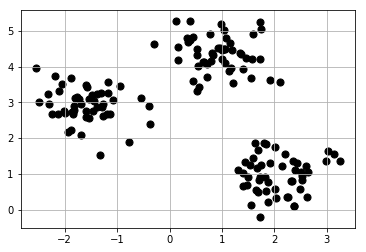

In [3]:
plt.scatter(X[:,0], X[:,1], c='black', marker='o', s=50)
plt.grid()
plt.show()

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,            # クラスターの個数
            init='random',           # セントロイドの初期値をランダムに設定  default: 'k-means++'
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数 default: '10' 実行したうちもっとSSE値が小さいモデルを最終モデルとして選択
            max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数  default: '300'
            tol=1e-04,               # 収束と判定するための相対的な許容誤差 default: '1e-04'
            random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態

y_km = km.fit_predict(X)

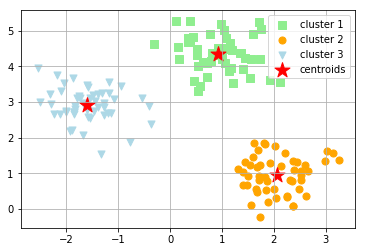

In [5]:
plt.scatter(X[y_km==0,0],         # y_km（クラスター番号）が0の時にXの0列目を抽出
                    X[y_km==0,1], # y_km（クラスター番号）が0の時にXの1列目を抽出
                    s=50,
                    c='lightgreen',
                    marker='s',
                    label='cluster 1')
plt.scatter(X[y_km==1,0],
                    X[y_km==1,1],
                    s=50,
                    c='orange',
                    marker='o',
                    label='cluster 2')
plt.scatter(X[y_km==2,0],
                   X[y_km==2,1],
                    s=50,
                    c='lightblue',
                    marker='v',
                    label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],   # km.cluster_centers_には各クラスターのセントロイドの座標が入っている
                    km.cluster_centers_[:,1],
                    s=250,
                    marker='*',
                    c='red',
                    label='centroids')
plt.legend()
plt.grid()
plt.show()

In [6]:
print ('Distortion: %.2f'% km.inertia_)

Distortion: 72.48


In [7]:
SSE = 0
for cluster in range(3):
    SSE += sum((km.cluster_centers_[cluster,0] - X[y_km==cluster,0])**2 + (km.cluster_centers_[cluster,1] - X[y_km==cluster,1])**2)
print(SSE)

72.47601671
